* https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/10561530-modeling-techniques
* https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/#h2_15
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/#h2_3

Interpret ACF and PACF plots

| ACF | PACF | Perfect ML -Model |
| --- | --- | --- |
| Plot declines gradually | Plot drops instantly | Auto Regressive model. |
| Plot drops instantly | Plot declines gradually | Moving Average model |
| Plot decline gradually | Plot Decline gradually | ARMA |
| Plot drop instantly | Plot drop instantly | You wouldn’t perform any model |

## Time Series Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data.index = data['Month']
data = data.drop(columns=['Month'])

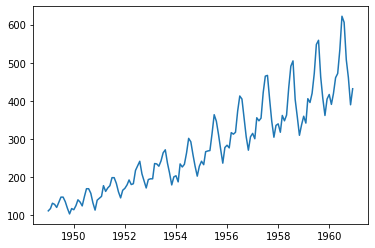

In [3]:
plt.plot(data)

In [4]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

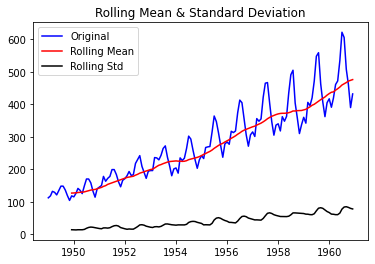

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [5]:
test_stationarity(data)

### Estimating & Eliminating Trend

In [6]:
ts = data['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
ts_log = np.log(data)

[Text(0.5, 1.0, 'Log Data')]

<Figure size 3600x7200 with 0 Axes>

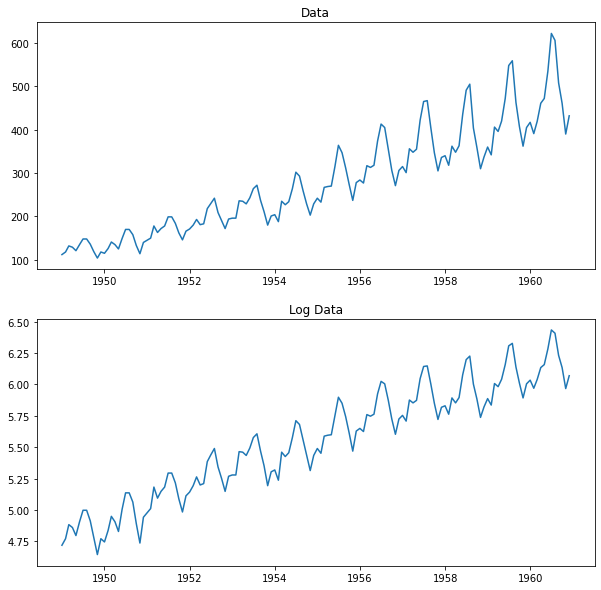

In [8]:
plt.figure(figsize=(50,100))
fig, axs = plt.subplots(2,figsize=(10,10))

axs[0].plot(data)
axs[0].set(title='Data')

axs[1].plot(ts_log)
axs[1].set(title='Log Data')

#### Moving average

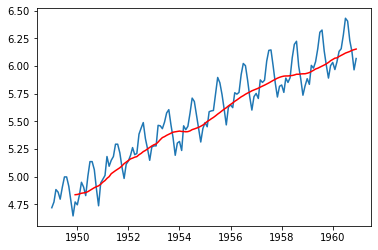

In [9]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


Removing nan values

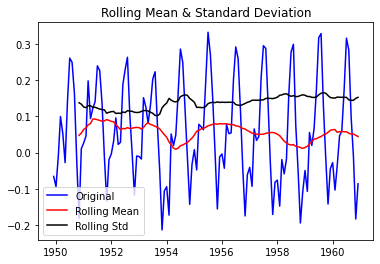

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

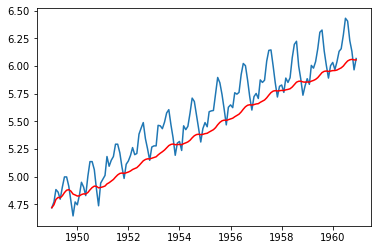

In [12]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

### Eliminating Trend and Seasonality

#### Differencing 

Lag 1

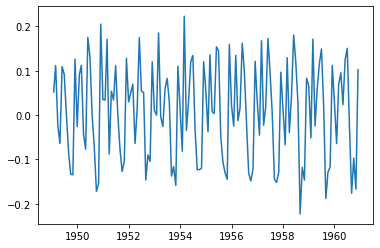

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

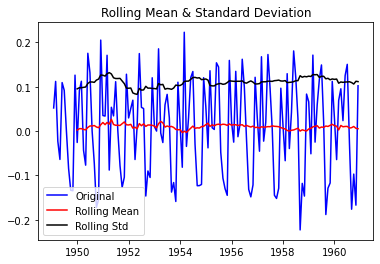

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [14]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Lag 2

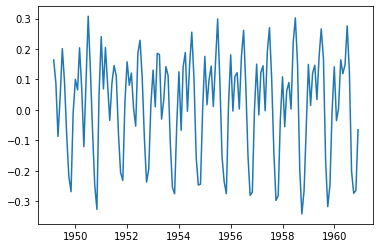

In [15]:
ts_log_diff_2 = ts_log - ts_log.shift(2)
plt.plot(ts_log_diff_2)

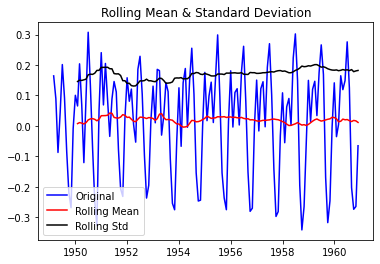

Results of Dickey-Fuller Test:
Test Statistic                  -3.167907
p-value                          0.021919
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
ts_log_diff_2.dropna(inplace=True)
test_stationarity(ts_log_diff_2)

#### Decomposition

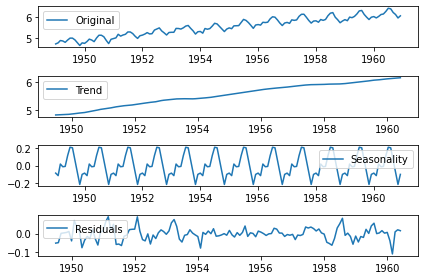

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

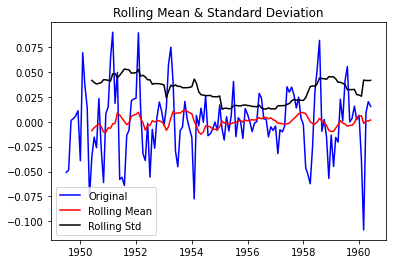

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [18]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [19]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

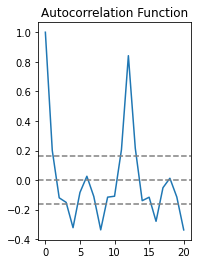

In [20]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

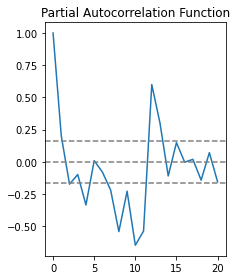

In [21]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### ARIMA

#### AR

In [22]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 1.5023')

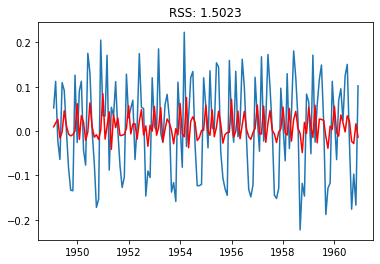

In [23]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues.values-ts_log_diff['#Passengers'])**2))

#### MA

Text(0.5, 1.0, 'RSS: 1.4721')

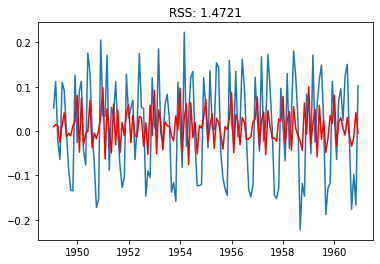

In [24]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues.values-ts_log_diff['#Passengers'])**2))

#### Combined Model

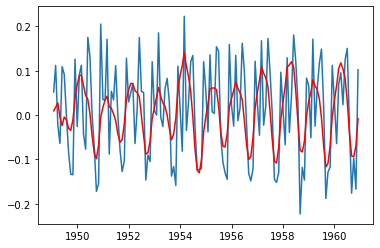

In [25]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues.values - ts_log_diff['#Passengers'])**2))

#### Taking it back to original scale

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [28]:
pd.Series(ts_log['#Passengers'][0], index=ts_log.index)

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64

In [29]:
predictions_ARIMA_log = pd.Series(ts_log['#Passengers'][0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

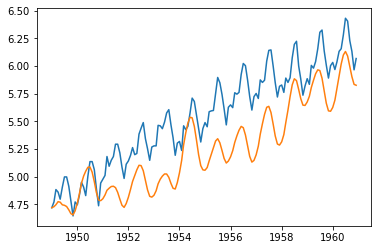

In [30]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.1046')

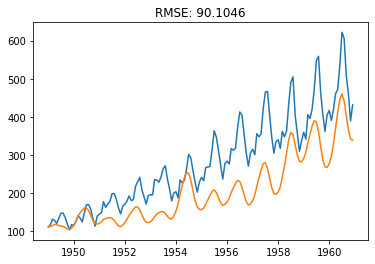

In [31]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA.values-data['#Passengers'])**2)/len(data)))

## Analytics Vidhya - Course

### Preprocessing

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [33]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')
train_original = train.copy()
test_original = test.copy()

In [34]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')

In [35]:
for i in (train,test,train_original,test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [36]:
train['dayofweek'] = train['Datetime'].dt.dayofweek

In [37]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    return 0

In [38]:
train['weekend'] = train['Datetime'].apply(applyer)

In [39]:
train.index = train.Datetime
train = train.drop('ID',1)

In [40]:
df = train.copy()

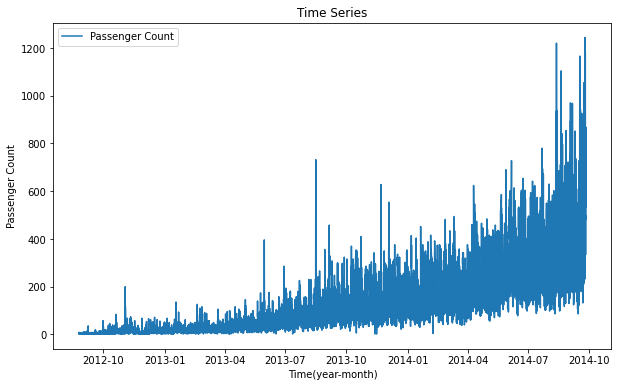

In [41]:
ts = df['Count']
plt.figure(figsize=(10,6))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel("Passenger Count")
plt.legend(loc='best')

### EDA

<AxesSubplot:xlabel='year'>

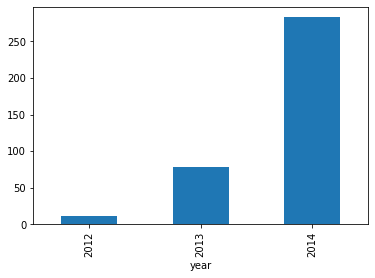

In [42]:
train.groupby(by='year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

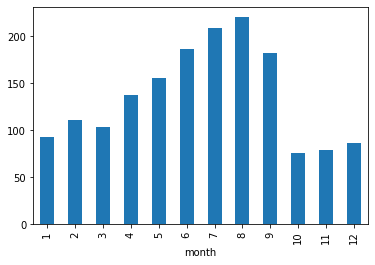

In [43]:
train.groupby(by='month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenegr Count(Monthwise)'}, xlabel='year,month'>

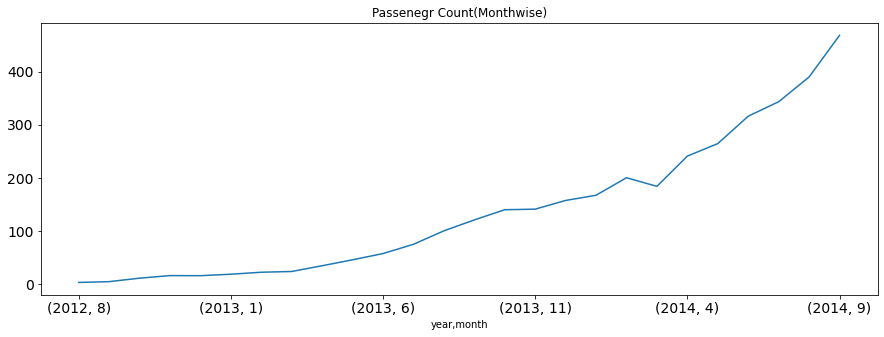

In [44]:
temp = train.groupby(by=['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passenegr Count(Monthwise)',fontsize=14)

<AxesSubplot:xlabel='day'>

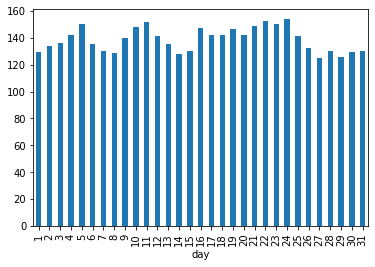

In [45]:
train.groupby(by='day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

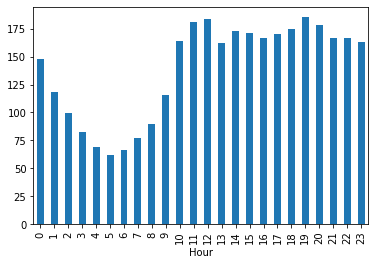

In [46]:
train.groupby(by='Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

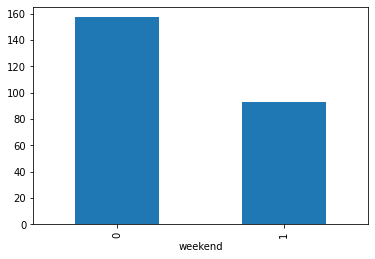

In [47]:
train.groupby(by='weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='dayofweek'>

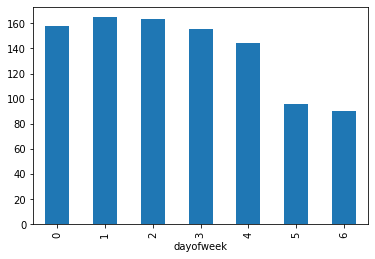

In [48]:
train.groupby(by='dayofweek')['Count'].mean().plot.bar()

In [49]:
# Hourly Time Series
hourly = train.resample('H').mean()
# daily Time Series
daily = train.resample('D').mean()
# Hourly Time Series
weekly = train.resample('W').mean()
# Hourly Time Series
monthly = train.resample('M').mean()

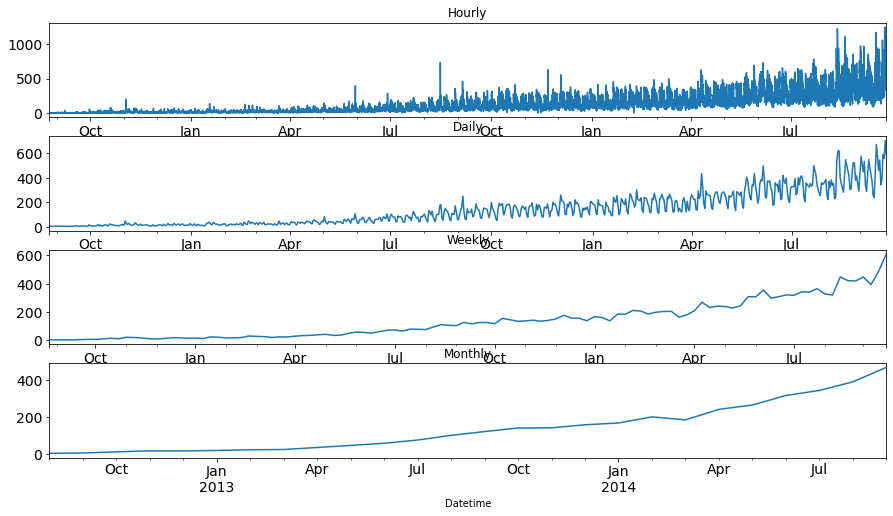

In [50]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axs[3])
plt.show()

In [51]:
test.index = test.Datetime
test = test.resample('D').mean()
train = train.resample('D').mean()

### Train and Valid Split

In [52]:
Train = train['2012-08-25':'2014-06-24']
valid = train['2014-06-25':'2014-09-25']

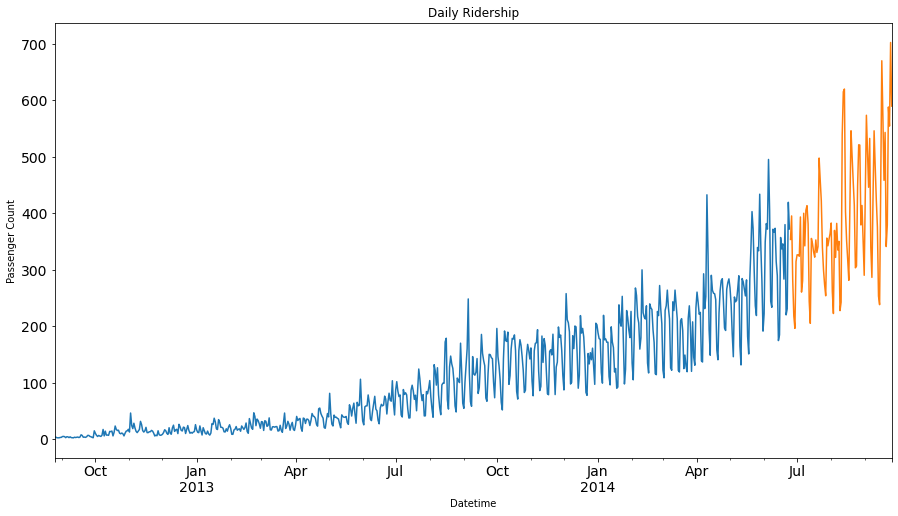

In [53]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.show()

### Modelling

#### Naive Approach

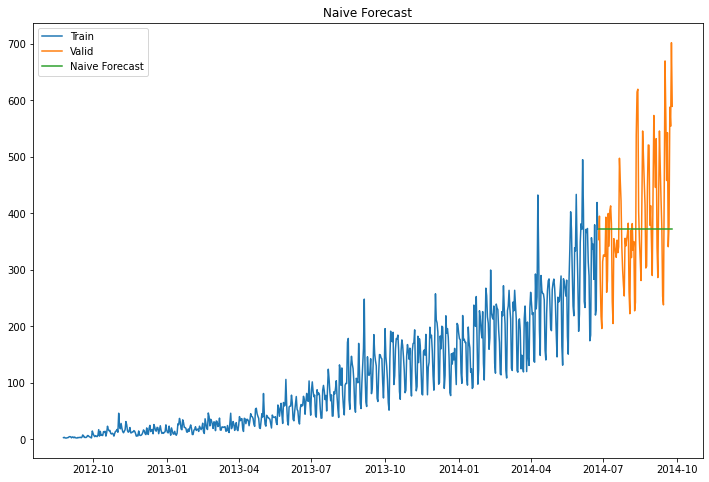

In [54]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [55]:
rms = mean_squared_error(valid.Count,y_hat.naive,squared=False)
print(rms)

111.79050467496724


#### Moving Average

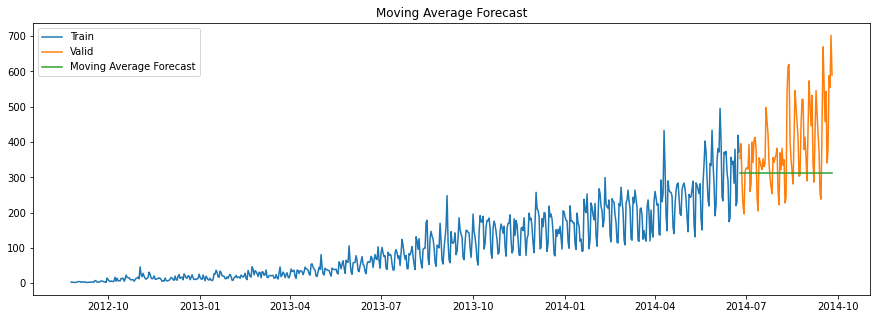

In [56]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean()[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')
plt.show()

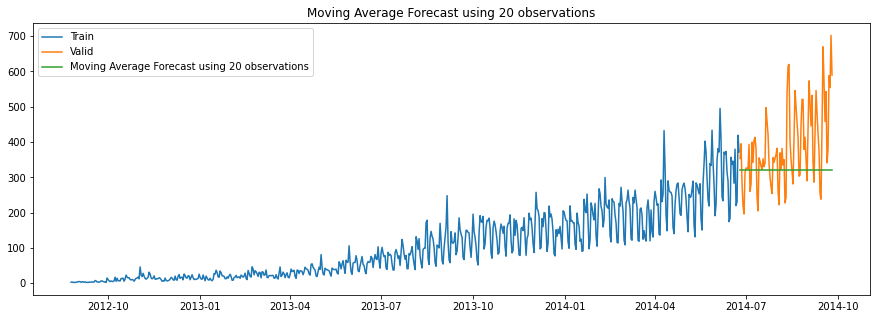

In [57]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean()[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.title('Moving Average Forecast using 20 observations')
plt.show()

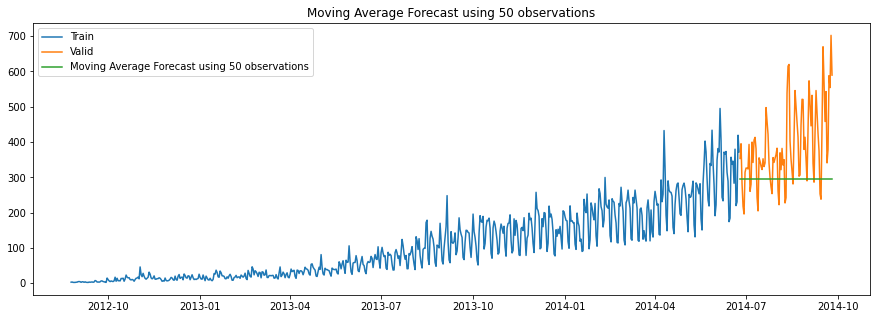

In [58]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean()[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.title('Moving Average Forecast using 50 observations')
plt.show()

In [59]:
rms = mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast,squared=False)
print(rms)

144.19175679986793


#### Simple Exponential Smoothing

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

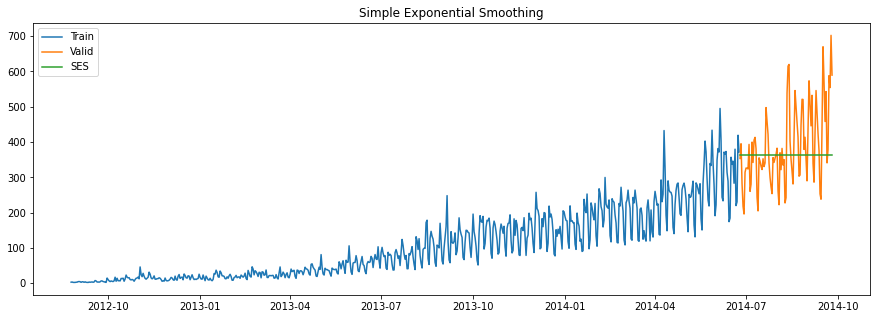

In [61]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(Train['Count']).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [62]:
rms = mean_squared_error(valid.Count,y_hat_avg.SES,squared=False)
print(rms)

113.43708111884514


#### Holt Linear Model

In [63]:
import statsmodels.api as sm

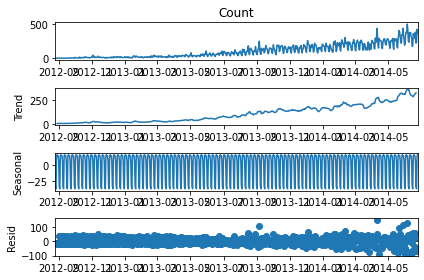

In [64]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)
plt.show()

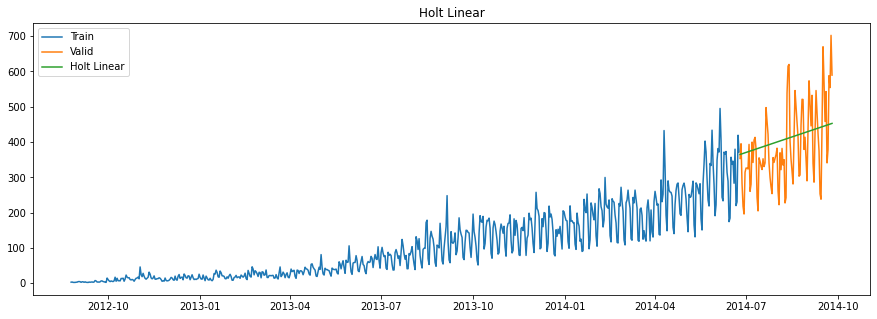

In [65]:
y_hat_avg = valid.copy()
fit1 = Holt(Train['Count']).fit(smoothing_level=0.6,smoothing_slope=0.005)
y_hat_avg['Holt_Linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_Linear'],label='Holt Linear')
plt.legend(loc='best')
plt.title('Holt Linear')
plt.show()

In [66]:
rms = mean_squared_error(valid.Count,y_hat_avg['Holt_Linear'],squared=False)
print(rms)

101.61101933521445


#### Holt Winter Model a.k.a Exponential Smoothing

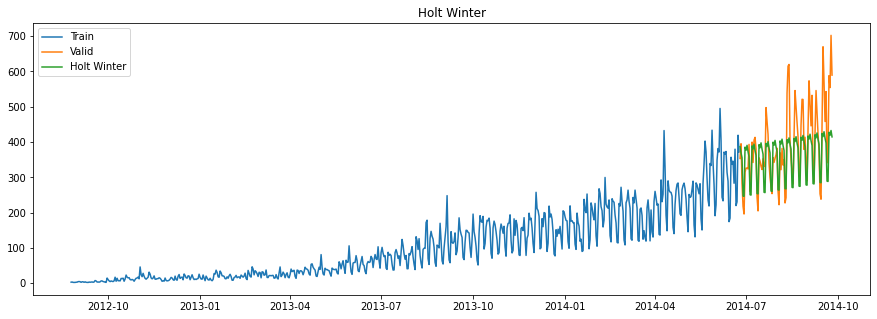

In [67]:
y_hat_avg = valid.copy()
fit2 = ExponentialSmoothing(Train['Count'],seasonal_periods=7,trend='add',seasonal='add').fit()
y_hat_avg['Holt_Winter'] = fit2.forecast(len(valid))
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_Winter'],label='Holt Winter')
plt.legend(loc='best')
plt.title('Holt Winter')
plt.show()

In [68]:
rms = mean_squared_error(valid.Count,y_hat_avg.Holt_Winter,squared=False)
print(rms)

82.32182333542627


## ARIMA Model

### Stationary Check

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
def test_stationarity1(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

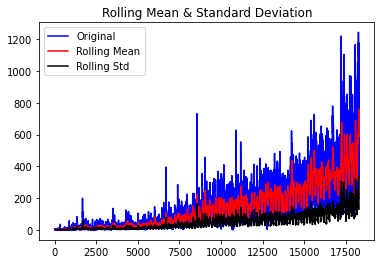

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [71]:
test_stationarity1(train_original['Count'])

### Removing Trend

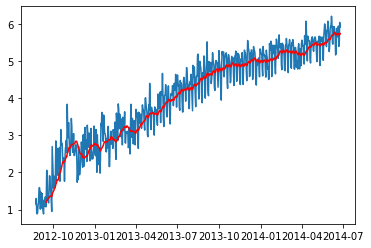

In [72]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

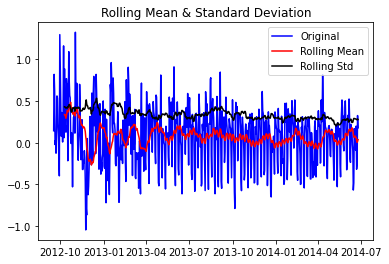

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [73]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity1(train_log_moving_avg_diff)

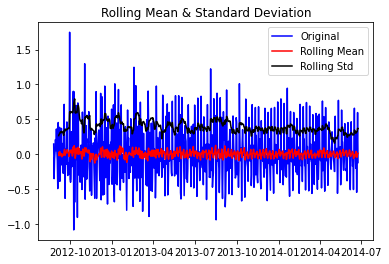

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [74]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

### Removing Seasonality

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
decomposition = seasonal_decompose(Train_log)

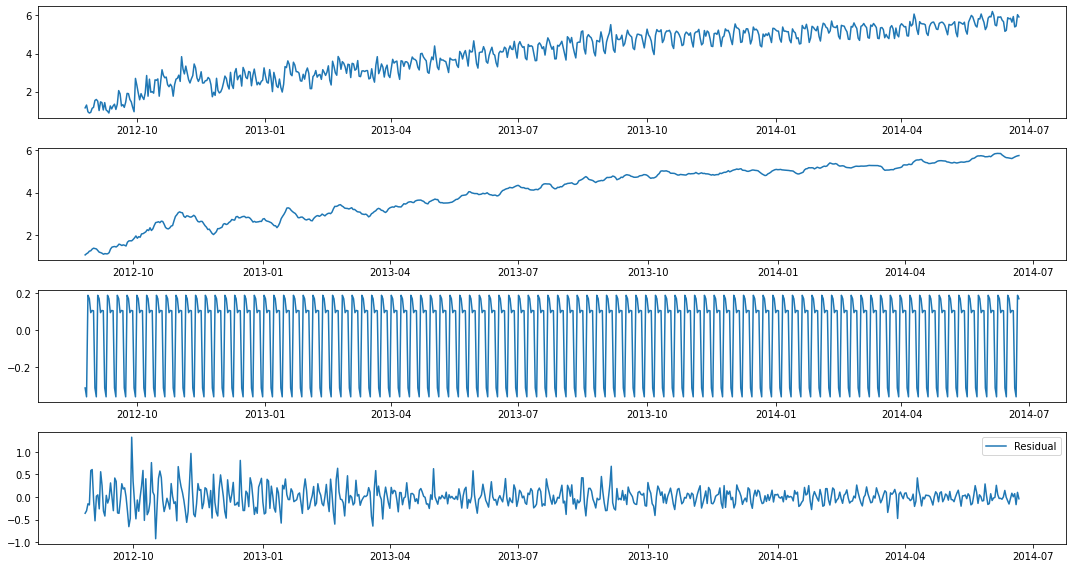

In [77]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, axs = plt.subplots(4,figsize=(15,8))
axs[0].plot(Train_log,label='Original')
axs[1].plot(trend,label='Trend')
axs[2].plot(seasonal,label='Seasonal')
axs[3].plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

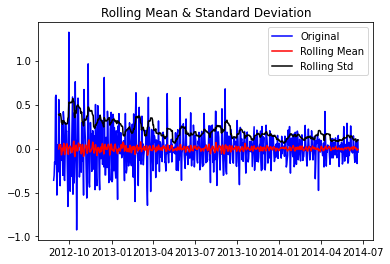

Results of Dickey-Fuller Test:
Test Statistic                -1.069361e+01
p-value                        3.672244e-19
#Lags Used                     2.000000e+01
Number of Observations Used    6.420000e+02
Critical Value (1%)           -3.440577e+00
Critical Value (5%)           -2.866052e+00
Critical Value (10%)          -2.569173e+00
dtype: float64


In [78]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)

In [79]:
from statsmodels.tsa.stattools import acf,pacf

In [80]:
lag_acf = acf(train_log_diff.dropna(),nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

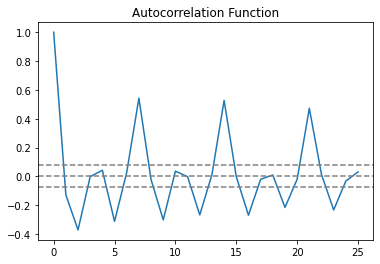

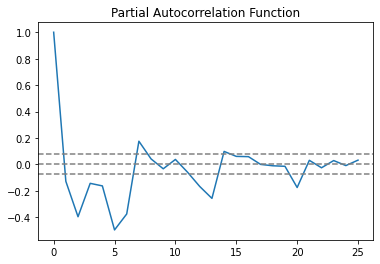

In [81]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()

* p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=2.
* q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=2.

* Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

### AR Model

In [82]:
from statsmodels.tsa.arima_model import ARIMA

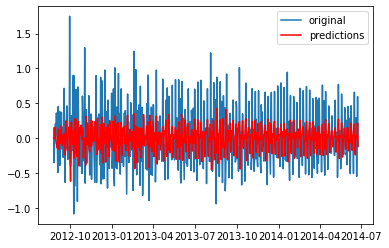

In [83]:
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

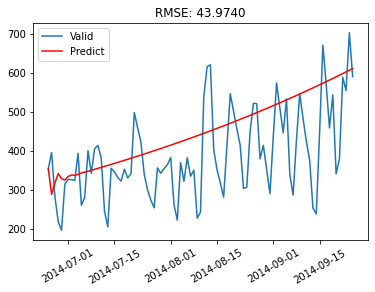

In [84]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.log(valid['Count'][0]),index=valid.index)
AR_predict1=AR_predict + AR_predict1
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
#plt.title('RMSE: %.4f'% (np.sqrt(np.mean(np.square(AR_predict - valid['Count']) ) ) ) )
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.xticks(rotation=30)
plt.show()

### MA Model

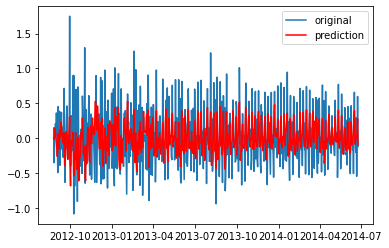

In [85]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

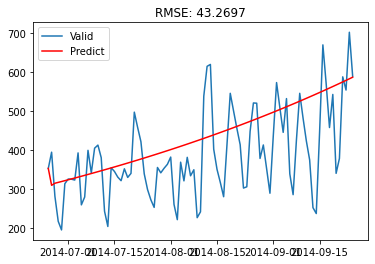

In [86]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.log(valid['Count'][0]),index=valid.index)
MA_predict1=MA_predict1 + MA_predict
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

### Combined Model

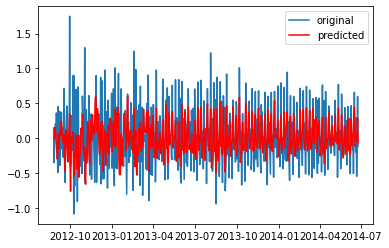

In [87]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [88]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [89]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

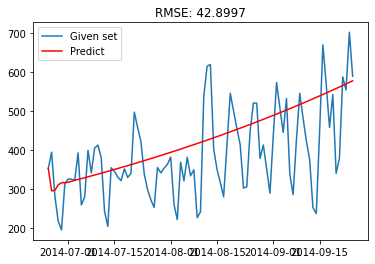

In [90]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX Model

In [91]:
import statsmodels.api as sm

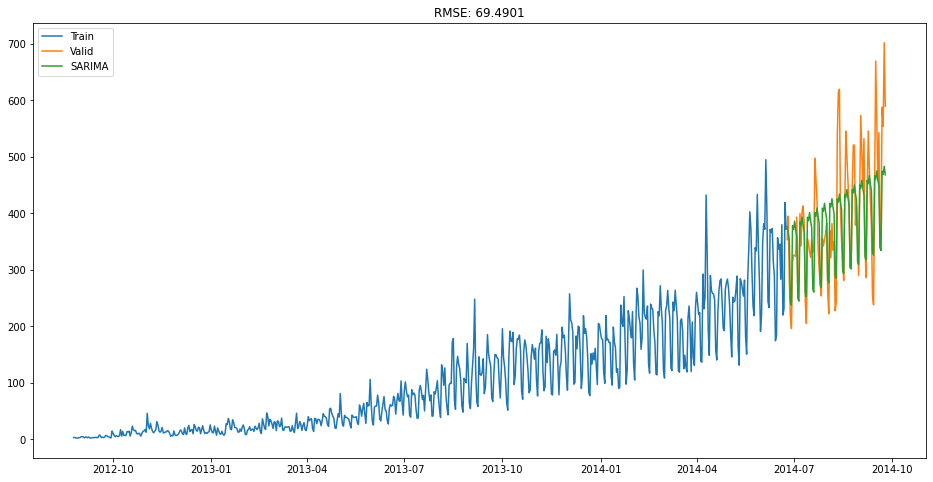

In [92]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train['Count'],order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-25',end='2014-09-25',dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(valid['Count'], label = "Valid")
plt.plot(y_hat_avg['SARIMA'], label = "SARIMA")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% mean_squared_error(valid.Count,y_hat_avg.SARIMA,squared=False))
plt.show()

In [101]:
fit1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.0681,0.237,-0.287,0.774,-0.533,0.397
ar.L2,0.7228,0.192,3.758,0.000,0.346,1.100
ma.L1,-0.4308,0.231,-1.867,0.062,-0.883,0.021
ma.L2,-1.0507,0.290,-3.623,0.000,-1.619,-0.482
ma.L3,0.2967,0.094,3.149,0.002,0.112,0.481
ma.L4,0.2058,0.069,2.995,0.003,0.071,0.340
ma.S.L7,-0.8306,0.019,-44.302,0.000,-0.867,-0.794
sigma2,507.7383,11.869,42.779,0.000,484.476,531.001


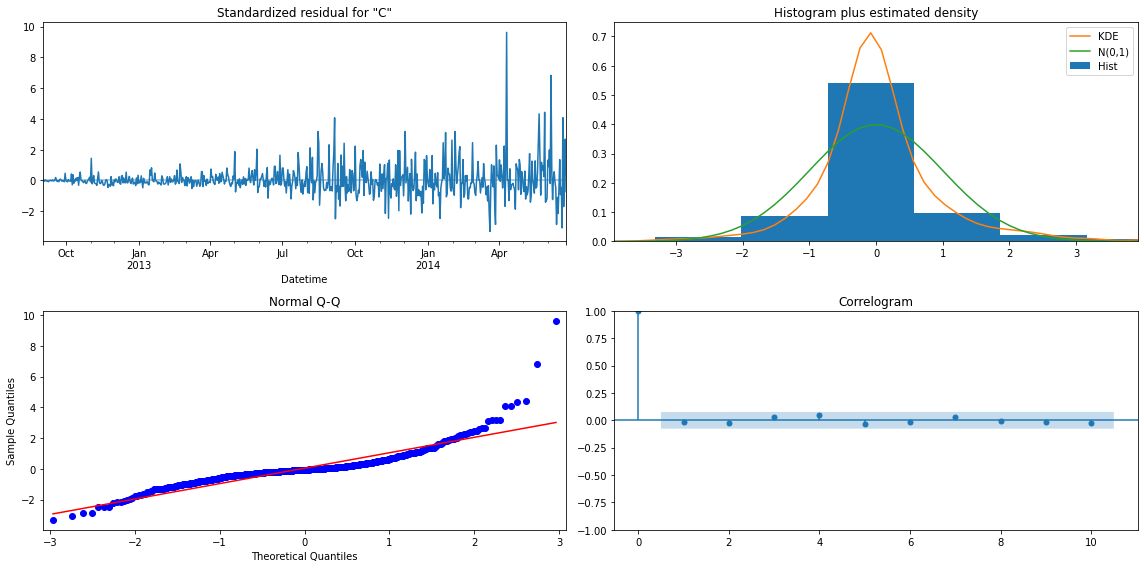

In [106]:
fit1.plot_diagnostics(figsize=(16,8))
plt.tight_layout()
plt.show()

In [93]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

train_original['ratio'] = train_original['Count']/train_original['Count'].sum()
temp = train_original.groupby(['Hour'])['ratio'].sum()
temp2 = pd.DataFrame(temp,columns=['ratio']).reset_index()

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left')
# Converting the ratio to the original scale 

prediction['Count']=prediction['prediction']*prediction['ratio']*24

prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 
submit = pd.DataFrame(submission,columns=['ID','Count'])
submit.head()
# Converting the final submission to csv format 
#pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

,ID,Count
0,18288,485.178407
1,18289,387.197752
2,18290,327.688558
3,18291,270.757349
4,18292,227.897279


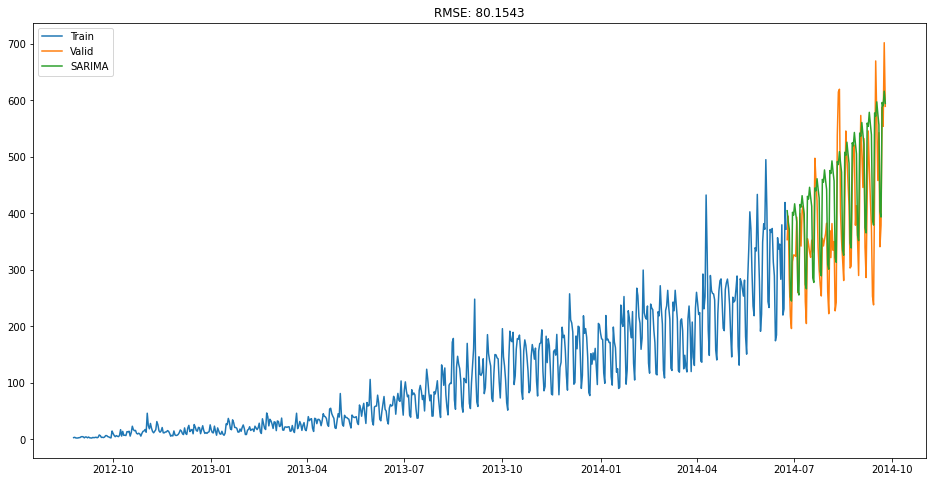

In [137]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train['Count'],order=(1,2,2),seasonal_order=(1,0,2,7),enforce_stationarity=False,enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-06-25',end='2014-09-25',dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(valid['Count'], label = "Valid")
plt.plot(y_hat_avg['SARIMA'], label = "SARIMA")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% mean_squared_error(valid.Count,y_hat_avg.SARIMA,squared=False))
plt.show()

In [107]:
import itertools

In [122]:
p = d = q = range(0,5)

In [123]:
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 0, 2, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (0, 1, 2, 7),
 (0, 2, 0, 7),
 (0, 2, 1, 7),
 (0, 2, 2, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 0, 2, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7),
 (1, 1, 2, 7),
 (1, 2, 0, 7),
 (1, 2, 1, 7),
 (1, 2, 2, 7),
 (2, 0, 0, 7),
 (2, 0, 1, 7),
 (2, 0, 2, 7),
 (2, 1, 0, 7),
 (2, 1, 1, 7),
 (2, 1, 2, 7),
 (2, 2, 0, 7),
 (2, 2, 1, 7),
 (2, 2, 2, 7)]

In [124]:
temp = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Train['Count'],order=param,seasonal_order=param_seasonal)
            results = mod.fit()
            print(f'ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
            temp.append(results.aic)
        except:
            print('1')

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:8534.0074515205
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:7905.060842707349
ARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:7470.750597374635
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:6452.940803756677
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:6299.95245446011
ARIMA(0, 0, 0)x(0, 1, 2, 7)12 - AIC:6301.923255387941
ARIMA(0, 0, 0)x(0, 2, 0, 7)12 - AIC:7061.308689020218
ARIMA(0, 0, 0)x(0, 2, 1, 7)12 - AIC:6417.6649861197475
ARIMA(0, 0, 0)x(0, 2, 2, 7)12 - AIC:6213.191711406878
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:6545.10957989464
ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:6396.831599000641
ARIMA(0, 0, 0)x(1, 0, 2, 7)12 - AIC:6398.804990635191
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:6334.199264276374
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:6301.921303078416
ARIMA(0, 0, 0)x(1, 1, 2, 7)12 - AIC:6297.277112065064
ARIMA(0, 0, 0)x(1, 2, 0, 7)12 - AIC:6675.414853486922
ARIMA(0, 0, 0)x(1, 2, 1, 7)12 - AIC:6294.755004950115
ARIMA(0, 0, 0)x(1, 2, 2, 7)12 - AIC:6207.721890165813
ARIMA(0, 0, 0)x(2, 0, 0, 7)12 -